In [1]:
# LIMPEZA E TRATAMENTO DOS DADOS

In [2]:
# Import das bibliotecas:
import numpy as np
import pandas as pd
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
dataset = pd.read_csv("Churn.csv", sep = ";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
dataset.shape

(999, 12)

In [5]:
# Nomeando as colunas
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio",
                   "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


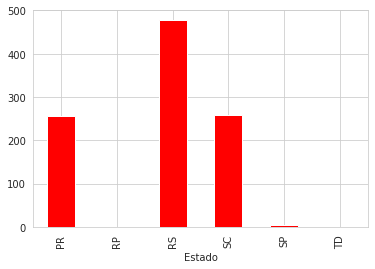

In [6]:
# DATAVIZ
# ESTADO
grupo_estados = dataset.groupby(["Estado"]).size()
grupo_estados.plot.bar(color="red")

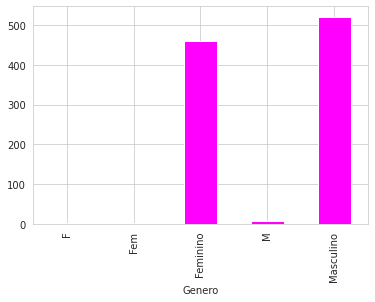

In [7]:
# GENERO
grupo_genero = dataset.groupby(["Genero"]).size()
grupo_genero.plot.bar(color="magenta")

Text(0.5, 1.0, 'Score')

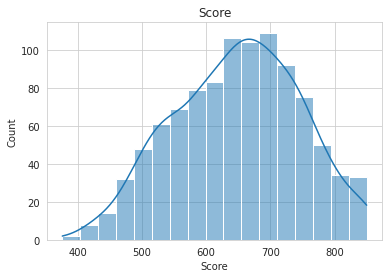

In [8]:
# SCORE
sns.histplot(dataset['Score'], kde=True).set_title('Score')

Text(0.5, 1.0, 'Idade')

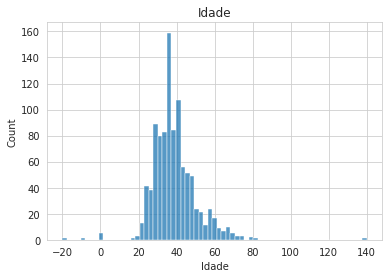

In [9]:
# IDADE
# Observar que existem dados fora do eixo(idades negativas e acima de 110)
sns.histplot(dataset['Idade']).set_title('Idade')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Idade')

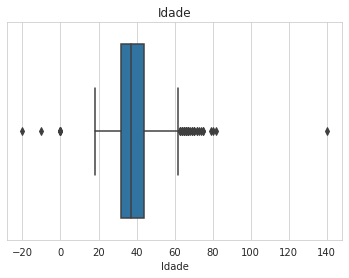

In [10]:
# IDADE
sns.boxplot(dataset['Idade']).set_title('Idade')

In [11]:
# VERIFICANDO SE EXISTEM VALORES N/A
dataset.isnull().sum()
# Genero e Salário

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [12]:
# Tratando missing values e falta de padronizações
# SALARIO
media_sal = sts.median(dataset["Salario"])

In [13]:
dataset["Salario"].fillna(media_sal, inplace=True)

In [14]:
dataset['Salario'].isnull().sum()

0

In [15]:
# GENERO
# Consolidar em apenas duas variaveis (não é ideal, visto que existem outros gêneros)
# preencher N/A's com a MODA

In [16]:
dataset['Genero'].fillna('Masculino', inplace = True)

In [17]:
dataset['Genero'].isnull().sum()

0

In [18]:
# preencher valores como M, F e Fem
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin([ 'F', 'Fem']), 'Genero'] = "Feminino"

In [19]:
grupo_genero = dataset.groupby(["Genero"]).size()
grupo_genero

Genero
Feminino     464
Masculino    535
dtype: int64

In [20]:
# IDADES
# Mediana das idades
mediana_idades = sts.median(dataset['Idade'])
mediana_idades

37

In [21]:
# Localizar quem está fora do range de idades permitido
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 110)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [22]:
# Aplicar a mediana nos mesmos
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 110), 'Idade']  = mediana_idades

In [23]:
# Conferindo se ainda há idades estranhas:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 110)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [24]:
# ID's DUPLICADOS
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [25]:
# Excluir pelo ID.  Keep = mantem o primeiro e apaga o segundo
dataset.drop_duplicates(subset="Id", keep="first", inplace=True)

In [26]:
# Buscar novamente por duplicatas
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [27]:
# ESTADOS FORA DO DOMINIO:
# Substituindo pela moda (RS)
dataset.loc[dataset['Estado'].isin(['SP', 'RP', 'TD']), "Estado"] = "RS"

In [28]:
# Conferindo
grupo_estados

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [29]:
# TRATAMENTO DE OUTLIERS: SALARIO
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [30]:
# Localizando salarios com o vaor acima do definido:
dataset.loc[dataset['Salario'] >= 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [31]:
# Mediana dos salários
mediana_salario = sts.median(dataset['Salario'])
mediana_salario

8637195.5

In [32]:
# Atribuindo a mediana para os valores
dataset.loc[dataset['Salario'] >= 2*desv, 'Salario'] = mediana_salario

In [33]:
# Conferindo:
dataset.loc[dataset['Salario'] >= 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [34]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [35]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [36]:
dataset.shape

(998, 12)